# Import necessary libraries


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

# Load the dataset


In [ ]:
df = pd.read_csv("/content/IMDb Movies India.csv", encoding='latin1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# Display basic information about the dataset


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


# Check for missing values


In [ ]:

print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


# Visualize missing data with a heatmap


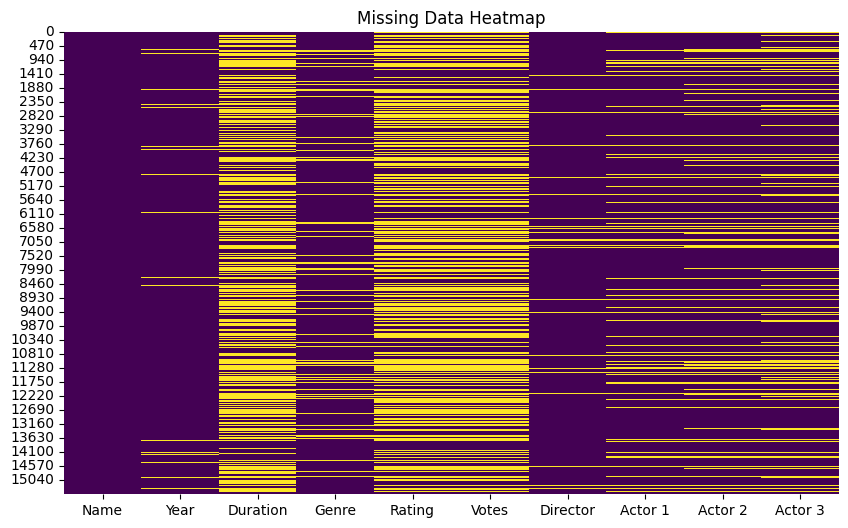

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


# Drop rows where 'Rating' is NaN


In [ ]:
df = df.dropna(subset=['Rating'])


# Convert 'Duration' to numeric by extracting the numerical part


In [ ]:

df['Duration'] = pd.to_numeric(df['Duration'].astype(str).str.extract('(\d+)', expand=False), errors='coerce')



# Convert 'Year' to numeric by extracting the numerical part

In [ ]:
df['Year'] = pd.to_numeric(df['Year'].astype(str).str.extract('(\d+)', expand=False), errors='coerce')


# Fill missing values in other columns using mean imputation


In [ ]:
imputer = SimpleImputer(strategy='mean')
df[['Year', 'Duration']] = imputer.fit_transform(df[['Year', 'Duration']])


# Encode categorical variables using One-Hot Encoding


In [ ]:
df = pd.get_dummies(df, columns=['Genre'], prefix='Genre', drop_first=True)


# Encode Director and Actors using Label Encoding


In [ ]:
label_encoder = LabelEncoder()
df['Director'] = label_encoder.fit_transform(df['Director'])
df['Actor 1'] = label_encoder.fit_transform(df['Actor 1'])
df['Actor 2'] = label_encoder.fit_transform(df['Actor 2'])
df['Actor 3'] = label_encoder.fit_transform(df['Actor 3'])


#Exploratory Data Analysis (EDA)

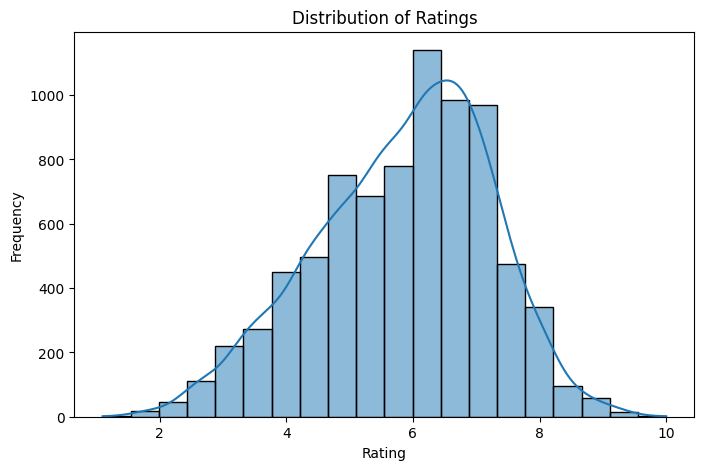

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Define functions for visualization


In [ ]:
def Talents(column):
    global df
    df[column].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Top Ten {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

In [ ]:
def Histo(column):
    global df
    plt.figure(figsize=(20,6))
    plt.hist(df[column], edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Histogram of {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
def Scatter(x, y, c=None):
    global df
    plt.figure(figsize=(20,6))
    plt.scatter(df[x], df[y], edgecolor="k", c=c)
    plt.xticks(rotation=0)
    plt.title("Scatter plot X:{} / Y:{}".format(x, y))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Apply visualization functions


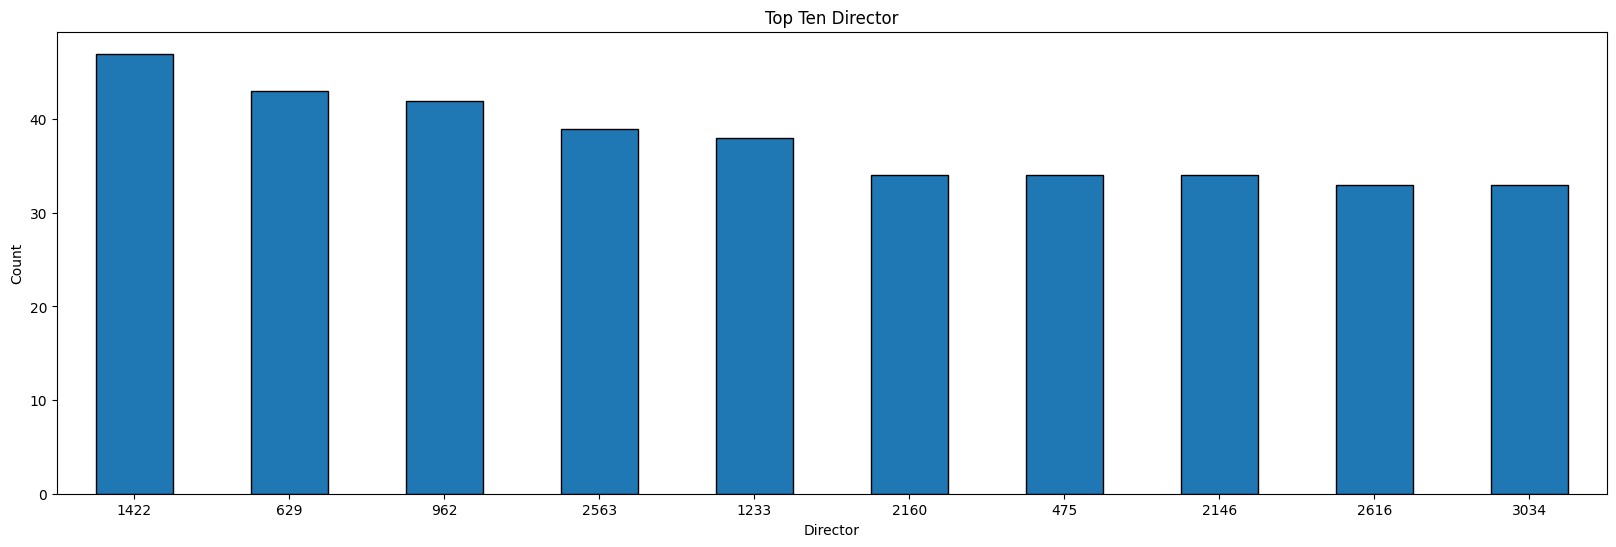

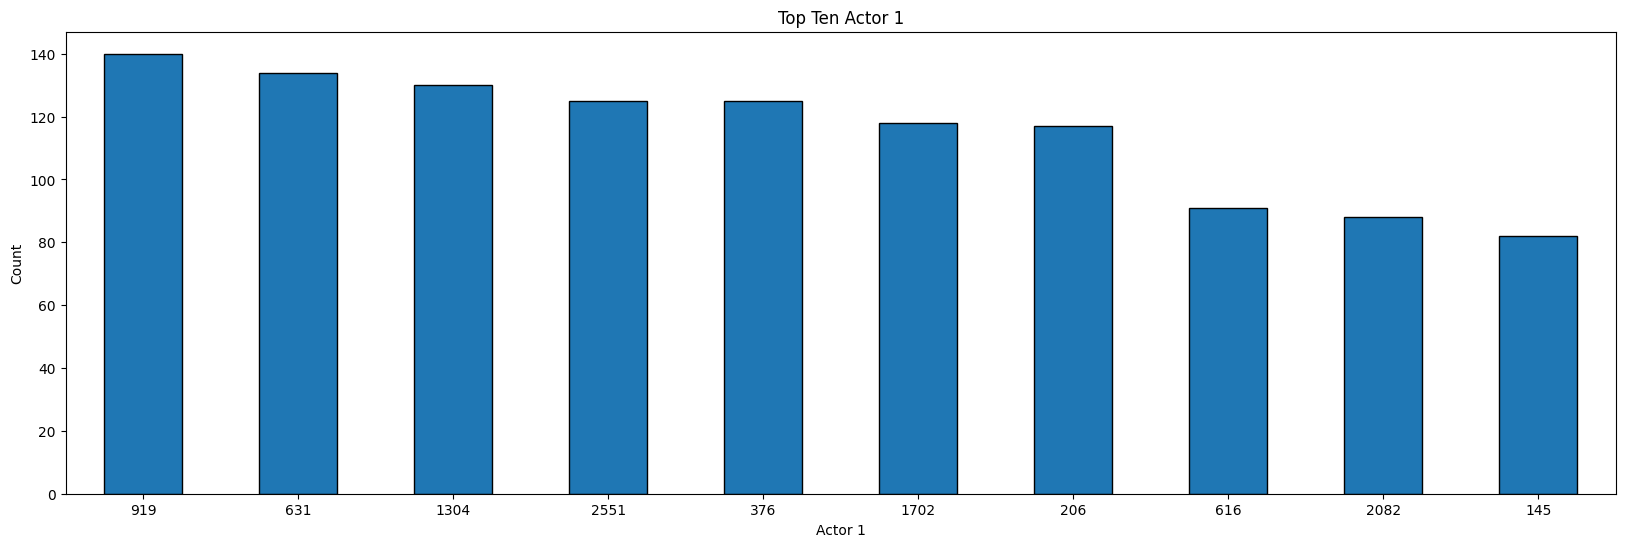

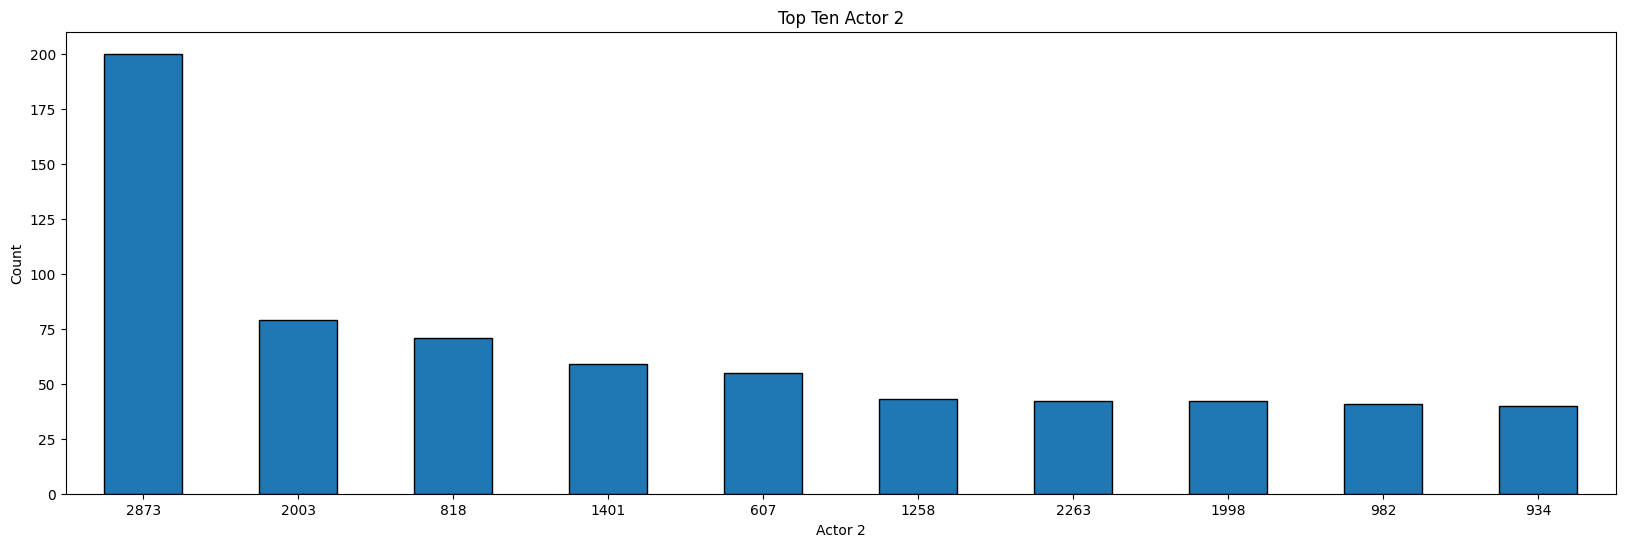

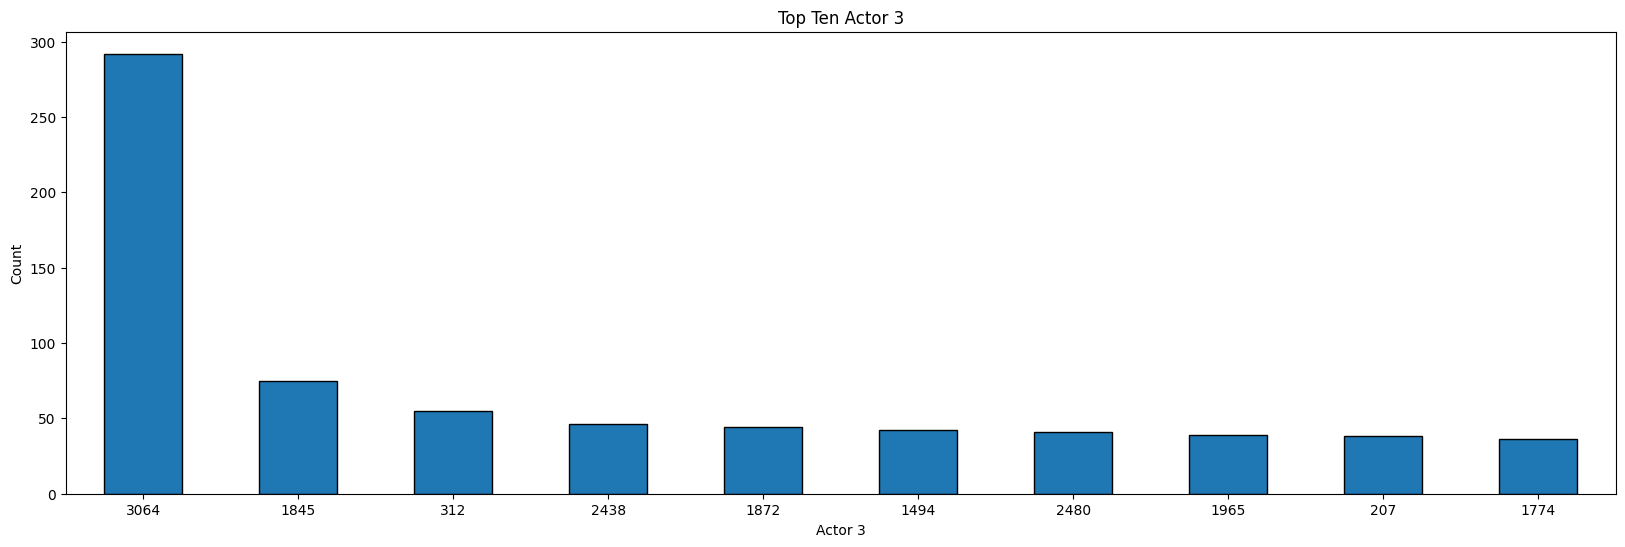

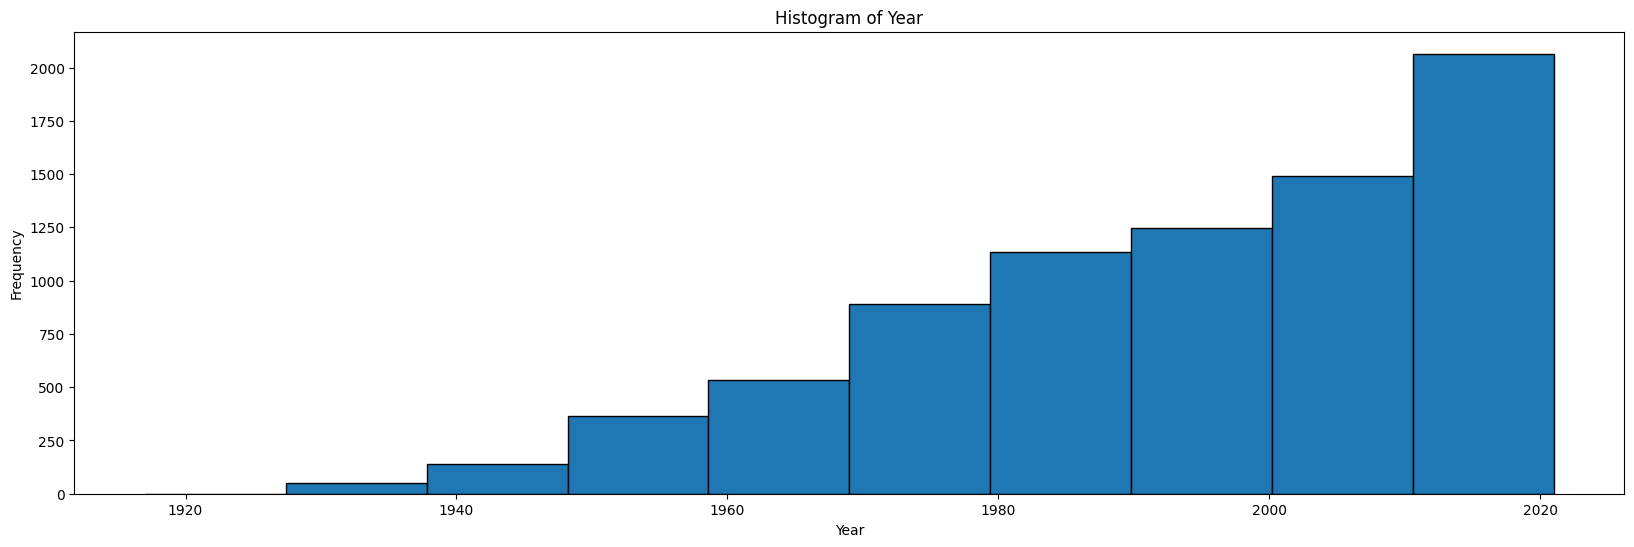

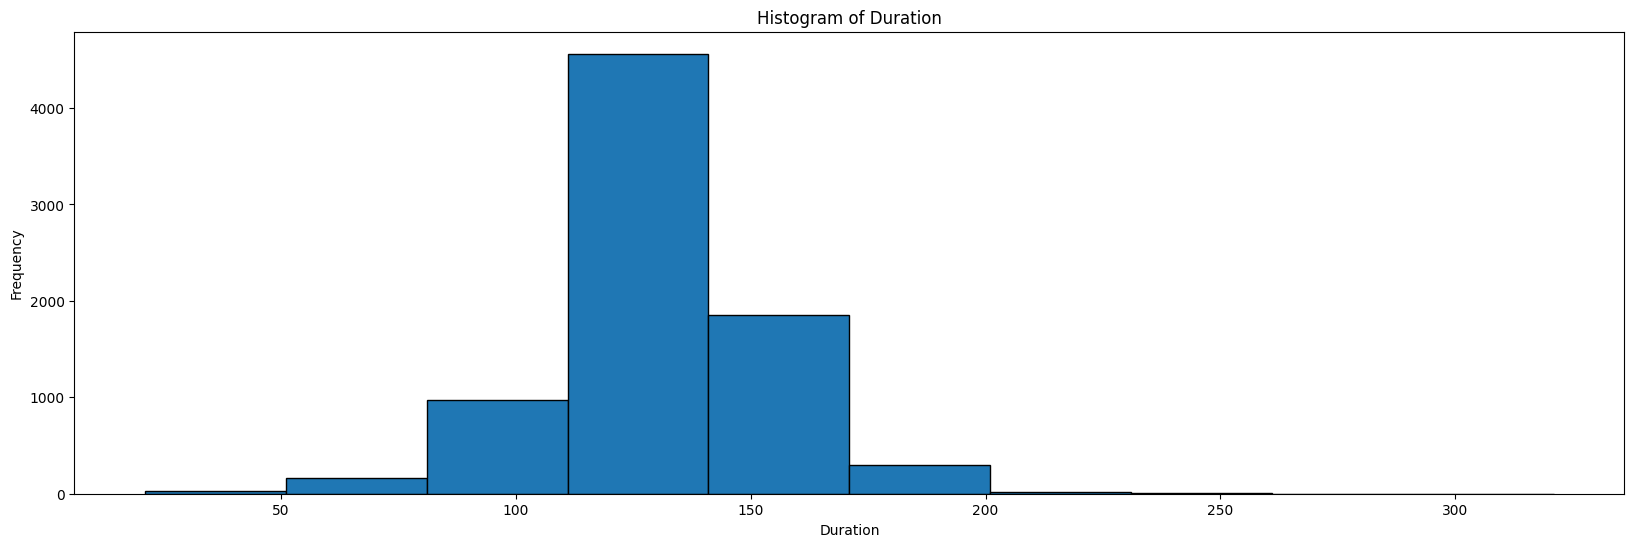

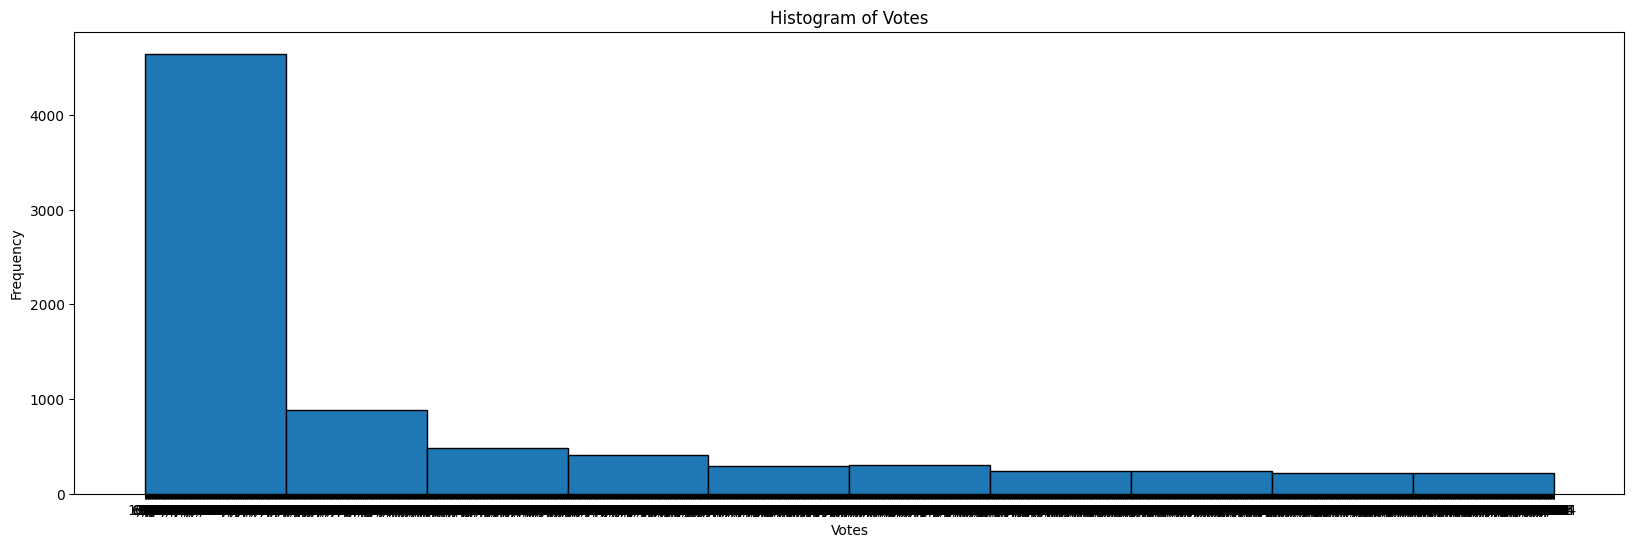

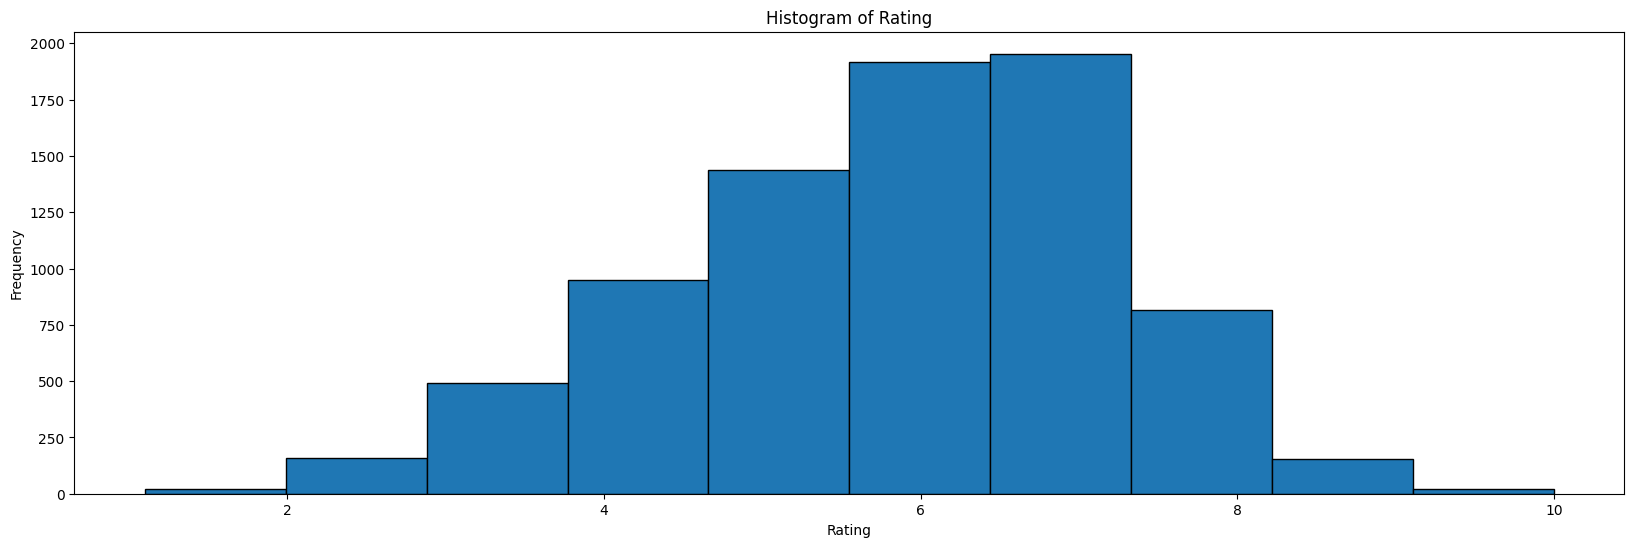

In [31]:
Talents("Director")
Talents("Actor 1")
Talents("Actor 2")
Talents("Actor 3")
Histo("Year")
Histo("Duration")
Histo("Votes")
Histo("Rating")

# Identify non-numeric columns


In [44]:
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
print(non_numeric_columns)

Index(['Name', 'Votes', 'Genre_Action, Adventure',
       'Genre_Action, Adventure, Biography', 'Genre_Action, Adventure, Comedy',
       'Genre_Action, Adventure, Crime', 'Genre_Action, Adventure, Drama',
       'Genre_Action, Adventure, Family', 'Genre_Action, Adventure, Fantasy',
       'Genre_Action, Adventure, History',
       ...
       'Genre_Romance, Thriller, Mystery', 'Genre_Sci-Fi',
       'Genre_Sci-Fi, Thriller', 'Genre_Sport', 'Genre_Thriller',
       'Genre_Thriller, Action', 'Genre_Thriller, Musical, Mystery',
       'Genre_Thriller, Mystery', 'Genre_Thriller, Mystery, Family',
       'Genre_War'],
      dtype='object', length=433)


# Display numeric columns


In [45]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr(method='spearman')
print(df.columns)

Index(['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3', 'Genre_Action, Adventure',
       ...
       'Genre_Romance, Thriller, Mystery', 'Genre_Sci-Fi',
       'Genre_Sci-Fi, Thriller', 'Genre_Sport', 'Genre_Thriller',
       'Genre_Thriller, Action', 'Genre_Thriller, Musical, Mystery',
       'Genre_Thriller, Mystery', 'Genre_Thriller, Mystery, Family',
       'Genre_War'],
      dtype='object', length=440)


In [46]:
print(df.columns)


Index(['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3', 'Genre_Action, Adventure',
       ...
       'Genre_Romance, Thriller, Mystery', 'Genre_Sci-Fi',
       'Genre_Sci-Fi, Thriller', 'Genre_Sport', 'Genre_Thriller',
       'Genre_Thriller, Action', 'Genre_Thriller, Musical, Mystery',
       'Genre_Thriller, Mystery', 'Genre_Thriller, Mystery, Family',
       'Genre_War'],
      dtype='object', length=440)


#Feature Engineering
# Add 'Genre_mean_rating' column


In [50]:
genre_mean_rating = df.groupby('Genre_Action, Adventure')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

In [52]:
df['Director_encoded'] = df.groupby('Director')['Rating'].transform('mean')
df['Actor_encoded'] = df.groupby('Actor 1')['Rating'].transform('mean')

# Remove commas and convert 'Votes' to numeric
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''), errors='coerce')

# Define the features and target variable
features = ['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor_encoded']
X = df[features]
y = df['Rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 0.5665
Mean Absolute Error: 0.5454
R2 Score: 0.6953


# Initialize and train a Linear Regression model


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set


In [ ]:
y_pred = lr.predict(X_test)

# Evaluate the model


In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



# Print the evaluation metrics


In [ ]:
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

# Scatter plot of actual vs. predicted ratings


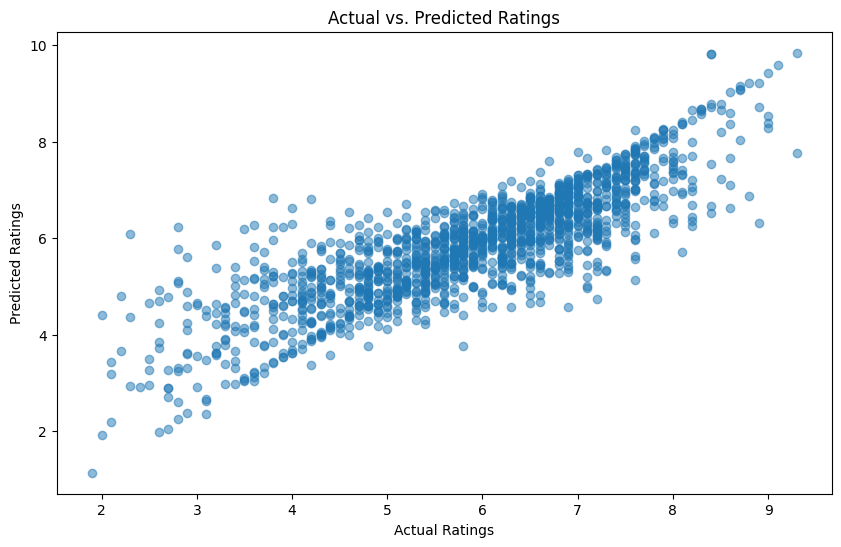

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

# Distribution of actual ratings and predicted ratings


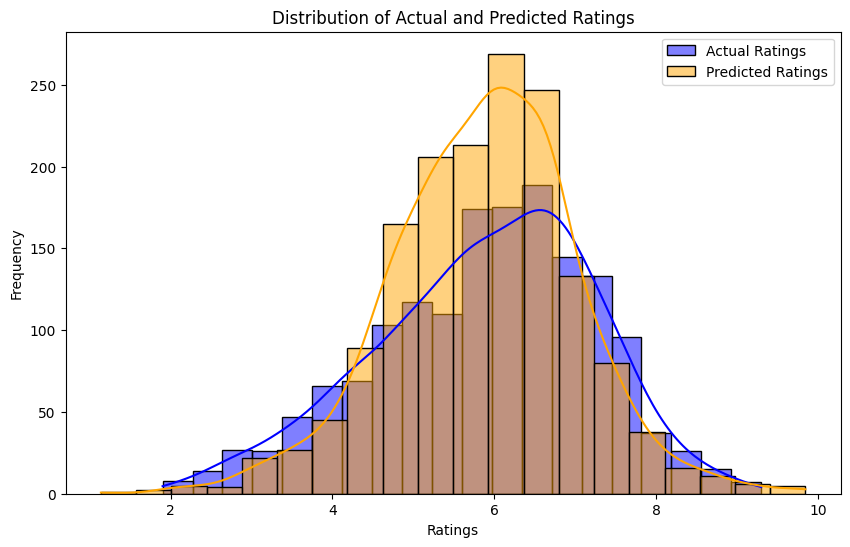

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, bins=20, kde=True, color='blue', label='Actual Ratings')
sns.histplot(y_pred, bins=20, kde=True, color='orange', label='Predicted Ratings')
plt.title('Distribution of Actual and Predicted Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.legend()
plt.show()